# 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [17]:
print(cust_df['var3'].value_counts()[:10])

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape: {0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
            eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, -1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [20]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)
params = {
    'max_depth': [5, 7],
    'min_child_weight': [1, 3],
    'colsample_bytree': [0.5, 0.75]
}

gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', 
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.722196	validation_1-auc:0.727319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.734627	validation_1-auc:0.738666
[2]	validation_0-auc:0.796925	validation_1-auc:0.800096
[3]	validation_0-auc:0.806833	validation_1-auc:0.810166
[4]	validation_0-auc:0.816994	validation_1-auc:0.818822
[5]	validation_0-auc:0.822156	validation_1-auc:0.824706
[6]	validation_0-auc:0.815975	validation_1-auc:0.81806
[7]	validation_0-auc:0.82537	validation_1-auc:0.824586
[8]	validation_0-auc:0.820067	validation_1-auc:0.81991
[9]	validation_0-auc:0.815942	validation_1-auc:0.817545
[10]	validation_0-auc:0.82344	validation_1-auc:0.824051
[11]	validation_0-auc:0.829401	validation_1-auc:0.828552
[12]	validation_0-auc:0.832124	validation_1-auc:0.832141
[13]	validation_0-auc:0.830658	validation_1-auc:0.830756
[14]	validation_0-auc:0.826655	validation_1-auc:0.827547
[1

[52]	validation_0-auc:0.863615	validation_1-auc:0.845387
[53]	validation_0-auc:0.864196	validation_1-auc:0.845225
[54]	validation_0-auc:0.864877	validation_1-auc:0.845704
[55]	validation_0-auc:0.865623	validation_1-auc:0.845856
[56]	validation_0-auc:0.866245	validation_1-auc:0.845706
[57]	validation_0-auc:0.866744	validation_1-auc:0.845688
[58]	validation_0-auc:0.867269	validation_1-auc:0.845733
[59]	validation_0-auc:0.867521	validation_1-auc:0.845862
[60]	validation_0-auc:0.867647	validation_1-auc:0.845845
[61]	validation_0-auc:0.867915	validation_1-auc:0.845791
[62]	validation_0-auc:0.868267	validation_1-auc:0.845643
[63]	validation_0-auc:0.868603	validation_1-auc:0.84572
[64]	validation_0-auc:0.86906	validation_1-auc:0.845417
[65]	validation_0-auc:0.869351	validation_1-auc:0.845569
[66]	validation_0-auc:0.869528	validation_1-auc:0.845547
[67]	validation_0-auc:0.869859	validation_1-auc:0.84557
[68]	validation_0-auc:0.870085	validation_1-auc:0.84561
[69]	validation_0-auc:0.870277	vali

[94]	validation_0-auc:0.874835	validation_1-auc:0.842949
[95]	validation_0-auc:0.875091	validation_1-auc:0.843065
[96]	validation_0-auc:0.875145	validation_1-auc:0.8431
[97]	validation_0-auc:0.875163	validation_1-auc:0.843158
[98]	validation_0-auc:0.875459	validation_1-auc:0.84334
[99]	validation_0-auc:0.875506	validation_1-auc:0.843251
[0]	validation_0-auc:0.722066	validation_1-auc:0.727229
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.738018	validation_1-auc:0.740393
[2]	validation_0-auc:0.804351	validation_1-auc:0.805954
[3]	validation_0-auc:0.813292	validation_1-auc:0.815981
[4]	validation_0-auc:0.819533	validation_1-auc:0.821282
[5]	validation_0-auc:0.823599	validation_1-auc:0.825532
[6]	validation_0-auc:0.816122	validation_1-auc:0.819008
[7]	validation_0-auc:0.823623	validation_1-auc:0.824128
[8]	validation_0-auc:0.820624	validation_1-auc:0.821328


[47]	validation_0-auc:0.859955	validation_1-auc:0.844961
[48]	validation_0-auc:0.860011	validation_1-auc:0.844933
[49]	validation_0-auc:0.860484	validation_1-auc:0.844955
[50]	validation_0-auc:0.860764	validation_1-auc:0.845118
[51]	validation_0-auc:0.860977	validation_1-auc:0.845045
[52]	validation_0-auc:0.861435	validation_1-auc:0.84469
[53]	validation_0-auc:0.861725	validation_1-auc:0.844572
[54]	validation_0-auc:0.862368	validation_1-auc:0.844764
[55]	validation_0-auc:0.863013	validation_1-auc:0.844854
[56]	validation_0-auc:0.863696	validation_1-auc:0.844626
[57]	validation_0-auc:0.864031	validation_1-auc:0.844785
[58]	validation_0-auc:0.86445	validation_1-auc:0.844664
[59]	validation_0-auc:0.864758	validation_1-auc:0.84494
[60]	validation_0-auc:0.865046	validation_1-auc:0.845162
[61]	validation_0-auc:0.865408	validation_1-auc:0.845025
[62]	validation_0-auc:0.865579	validation_1-auc:0.844917
[63]	validation_0-auc:0.865861	validation_1-auc:0.844766
[64]	validation_0-auc:0.866226	val

[97]	validation_0-auc:0.871975	validation_1-auc:0.843618
[98]	validation_0-auc:0.87216	validation_1-auc:0.843716
[99]	validation_0-auc:0.872445	validation_1-auc:0.84359
[0]	validation_0-auc:0.724391	validation_1-auc:0.727365
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.738742	validation_1-auc:0.738169
[2]	validation_0-auc:0.804491	validation_1-auc:0.801331
[3]	validation_0-auc:0.81765	validation_1-auc:0.815022
[4]	validation_0-auc:0.828165	validation_1-auc:0.824188
[5]	validation_0-auc:0.831954	validation_1-auc:0.828839
[6]	validation_0-auc:0.825603	validation_1-auc:0.823018
[7]	validation_0-auc:0.833273	validation_1-auc:0.828249
[8]	validation_0-auc:0.830077	validation_1-auc:0.824989
[9]	validation_0-auc:0.828138	validation_1-auc:0.821393
[10]	validation_0-auc:0.8356	validation_1-auc:0.827882
[11]	validation_0-auc:0.839715	validation_1-auc:0.831457
[12

[52]	validation_0-auc:0.883698	validation_1-auc:0.845513
[53]	validation_0-auc:0.884103	validation_1-auc:0.845379
[54]	validation_0-auc:0.884579	validation_1-auc:0.845142
[55]	validation_0-auc:0.885291	validation_1-auc:0.845211
[56]	validation_0-auc:0.885727	validation_1-auc:0.845436
[57]	validation_0-auc:0.886259	validation_1-auc:0.845432
[58]	validation_0-auc:0.886818	validation_1-auc:0.845236
[59]	validation_0-auc:0.886997	validation_1-auc:0.845248
[60]	validation_0-auc:0.887115	validation_1-auc:0.845298
[61]	validation_0-auc:0.887323	validation_1-auc:0.845285
[62]	validation_0-auc:0.887608	validation_1-auc:0.845066
[63]	validation_0-auc:0.888077	validation_1-auc:0.845029
[64]	validation_0-auc:0.888584	validation_1-auc:0.84486
[65]	validation_0-auc:0.888792	validation_1-auc:0.845026
[66]	validation_0-auc:0.888928	validation_1-auc:0.845049
[67]	validation_0-auc:0.889276	validation_1-auc:0.844879
[68]	validation_0-auc:0.889483	validation_1-auc:0.844815
[69]	validation_0-auc:0.889673	v

[22]	validation_0-auc:0.851638	validation_1-auc:0.836923
[23]	validation_0-auc:0.850763	validation_1-auc:0.835558
[24]	validation_0-auc:0.851003	validation_1-auc:0.834288
[25]	validation_0-auc:0.851323	validation_1-auc:0.832823
[26]	validation_0-auc:0.854205	validation_1-auc:0.834649
[27]	validation_0-auc:0.854389	validation_1-auc:0.833689
[28]	validation_0-auc:0.856704	validation_1-auc:0.834981
[29]	validation_0-auc:0.858942	validation_1-auc:0.835809
[30]	validation_0-auc:0.859164	validation_1-auc:0.834996
[31]	validation_0-auc:0.858706	validation_1-auc:0.833931
[32]	validation_0-auc:0.861433	validation_1-auc:0.835058
[33]	validation_0-auc:0.863515	validation_1-auc:0.836044
[34]	validation_0-auc:0.865782	validation_1-auc:0.836541
[35]	validation_0-auc:0.865891	validation_1-auc:0.835812
[36]	validation_0-auc:0.867579	validation_1-auc:0.83707
[37]	validation_0-auc:0.868512	validation_1-auc:0.836929
[38]	validation_0-auc:0.869163	validation_1-auc:0.837718
[39]	validation_0-auc:0.86901	va

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.744241	validation_1-auc:0.744834
[2]	validation_0-auc:0.817067	validation_1-auc:0.815013
[3]	validation_0-auc:0.827635	validation_1-auc:0.822521
[4]	validation_0-auc:0.833183	validation_1-auc:0.827331
[5]	validation_0-auc:0.837562	validation_1-auc:0.831832
[6]	validation_0-auc:0.837668	validation_1-auc:0.830183
[7]	validation_0-auc:0.840019	validation_1-auc:0.830929
[8]	validation_0-auc:0.840688	validation_1-auc:0.830663
[9]	validation_0-auc:0.838062	validation_1-auc:0.829081
[10]	validation_0-auc:0.842272	validation_1-auc:0.83177
[11]	validation_0-auc:0.845153	validation_1-auc:0.833522
[12]	validation_0-auc:0.847324	validation_1-auc:0.835873
[13]	validation_0-auc:0.846467	validation_1-auc:0.834369
[14]	validation_0-auc:0.845877	validation_1-auc:0.832778
[15]	validation_0-auc:0.848705	validation_1-auc:0.834133
[16]	validation_0-auc:0.848319	validation_1-auc:0.832893
[17]	validation_0-auc:0.849346	val

[55]	validation_0-auc:0.863337	validation_1-auc:0.839406
[56]	validation_0-auc:0.863465	validation_1-auc:0.839524
[57]	validation_0-auc:0.863772	validation_1-auc:0.839405
[58]	validation_0-auc:0.864232	validation_1-auc:0.839204
[59]	validation_0-auc:0.86457	validation_1-auc:0.839326
[60]	validation_0-auc:0.864887	validation_1-auc:0.838997
[61]	validation_0-auc:0.865216	validation_1-auc:0.838909
[62]	validation_0-auc:0.865897	validation_1-auc:0.838957
Stopping. Best iteration:
[32]	validation_0-auc:0.852133	validation_1-auc:0.840984

[0]	validation_0-auc:0.727663	validation_1-auc:0.734372
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.741882	validation_1-auc:0.747952
[2]	validation_0-auc:0.804701	validation_1-auc:0.809341
[3]	validation_0-auc:0.816388	validation_1-auc:0.822734
[4]	validation_0-auc:0.827214	validation_1-auc:0.82897
[5]	validation_0-auc:0.82

[56]	validation_0-auc:0.866756	validation_1-auc:0.843666
[57]	validation_0-auc:0.867009	validation_1-auc:0.843687
[58]	validation_0-auc:0.867583	validation_1-auc:0.84348
[59]	validation_0-auc:0.867671	validation_1-auc:0.843357
[60]	validation_0-auc:0.868239	validation_1-auc:0.843217
[61]	validation_0-auc:0.868558	validation_1-auc:0.842921
[62]	validation_0-auc:0.868794	validation_1-auc:0.842845
[63]	validation_0-auc:0.869265	validation_1-auc:0.842847
[64]	validation_0-auc:0.869447	validation_1-auc:0.842801
[65]	validation_0-auc:0.869939	validation_1-auc:0.842727
[66]	validation_0-auc:0.870224	validation_1-auc:0.843014
[67]	validation_0-auc:0.870683	validation_1-auc:0.842758
[68]	validation_0-auc:0.871174	validation_1-auc:0.842683
[69]	validation_0-auc:0.871401	validation_1-auc:0.842426
[70]	validation_0-auc:0.871802	validation_1-auc:0.84301
[71]	validation_0-auc:0.872044	validation_1-auc:0.842947
[72]	validation_0-auc:0.872237	validation_1-auc:0.843194
[73]	validation_0-auc:0.872312	va

[43]	validation_0-auc:0.859948	validation_1-auc:0.842967
[44]	validation_0-auc:0.860098	validation_1-auc:0.84288
[45]	validation_0-auc:0.860498	validation_1-auc:0.843008
[46]	validation_0-auc:0.8608	validation_1-auc:0.843066
[47]	validation_0-auc:0.861331	validation_1-auc:0.843186
[48]	validation_0-auc:0.861671	validation_1-auc:0.843537
[49]	validation_0-auc:0.862049	validation_1-auc:0.843756
[50]	validation_0-auc:0.862337	validation_1-auc:0.843497
[51]	validation_0-auc:0.862831	validation_1-auc:0.84319
[52]	validation_0-auc:0.862897	validation_1-auc:0.84335
[53]	validation_0-auc:0.863118	validation_1-auc:0.842873
[54]	validation_0-auc:0.863603	validation_1-auc:0.842935
[55]	validation_0-auc:0.864004	validation_1-auc:0.842966
[56]	validation_0-auc:0.864269	validation_1-auc:0.842989
[57]	validation_0-auc:0.864558	validation_1-auc:0.843124
[58]	validation_0-auc:0.865079	validation_1-auc:0.842835
[59]	validation_0-auc:0.865225	validation_1-auc:0.842929
[60]	validation_0-auc:0.865447	valid

[25]	validation_0-auc:0.86104	validation_1-auc:0.836142
[26]	validation_0-auc:0.863143	validation_1-auc:0.837016
[27]	validation_0-auc:0.865065	validation_1-auc:0.838056
[28]	validation_0-auc:0.866598	validation_1-auc:0.838985
[29]	validation_0-auc:0.867445	validation_1-auc:0.839448
[30]	validation_0-auc:0.868273	validation_1-auc:0.840237
[31]	validation_0-auc:0.868552	validation_1-auc:0.839934
[32]	validation_0-auc:0.869824	validation_1-auc:0.839546
[33]	validation_0-auc:0.871061	validation_1-auc:0.839274
[34]	validation_0-auc:0.871961	validation_1-auc:0.839414
[35]	validation_0-auc:0.873119	validation_1-auc:0.839131
[36]	validation_0-auc:0.874205	validation_1-auc:0.839051
[37]	validation_0-auc:0.875173	validation_1-auc:0.838454
[38]	validation_0-auc:0.875799	validation_1-auc:0.838118
[39]	validation_0-auc:0.87657	validation_1-auc:0.837868
[40]	validation_0-auc:0.877488	validation_1-auc:0.837614
[41]	validation_0-auc:0.878303	validation_1-auc:0.837691
[42]	validation_0-auc:0.879311	va

[27]	validation_0-auc:0.867949	validation_1-auc:0.838735
[28]	validation_0-auc:0.869477	validation_1-auc:0.838997
[29]	validation_0-auc:0.870978	validation_1-auc:0.839626
[30]	validation_0-auc:0.872181	validation_1-auc:0.839457
[31]	validation_0-auc:0.872515	validation_1-auc:0.840029
[32]	validation_0-auc:0.873985	validation_1-auc:0.839723
[33]	validation_0-auc:0.875434	validation_1-auc:0.839326
[34]	validation_0-auc:0.876422	validation_1-auc:0.839343
[35]	validation_0-auc:0.877284	validation_1-auc:0.83905
[36]	validation_0-auc:0.878091	validation_1-auc:0.839564
[37]	validation_0-auc:0.879494	validation_1-auc:0.839373
[38]	validation_0-auc:0.880387	validation_1-auc:0.8401
[39]	validation_0-auc:0.880613	validation_1-auc:0.84033
[40]	validation_0-auc:0.881038	validation_1-auc:0.839998
[41]	validation_0-auc:0.881446	validation_1-auc:0.840132
[42]	validation_0-auc:0.882144	validation_1-auc:0.840283
[43]	validation_0-auc:0.882817	validation_1-auc:0.840408
[44]	validation_0-auc:0.883273	vali

[20]	validation_0-auc:0.859755	validation_1-auc:0.841057
[21]	validation_0-auc:0.861045	validation_1-auc:0.840823
[22]	validation_0-auc:0.861299	validation_1-auc:0.840585
[23]	validation_0-auc:0.8628	validation_1-auc:0.840956
[24]	validation_0-auc:0.862496	validation_1-auc:0.840996
[25]	validation_0-auc:0.861695	validation_1-auc:0.839797
[26]	validation_0-auc:0.863491	validation_1-auc:0.839826
[27]	validation_0-auc:0.864652	validation_1-auc:0.840647
[28]	validation_0-auc:0.866273	validation_1-auc:0.839676
[29]	validation_0-auc:0.867251	validation_1-auc:0.839784
[30]	validation_0-auc:0.867844	validation_1-auc:0.839736
[31]	validation_0-auc:0.867916	validation_1-auc:0.839961
[32]	validation_0-auc:0.868653	validation_1-auc:0.840119
[33]	validation_0-auc:0.869303	validation_1-auc:0.839819
[34]	validation_0-auc:0.870228	validation_1-auc:0.840266
[35]	validation_0-auc:0.871014	validation_1-auc:0.84056
[36]	validation_0-auc:0.872001	validation_1-auc:0.840888
[37]	validation_0-auc:0.872844	val

[80]	validation_0-auc:0.887246	validation_1-auc:0.841529
[81]	validation_0-auc:0.8873	validation_1-auc:0.841452
[82]	validation_0-auc:0.887414	validation_1-auc:0.841426
[83]	validation_0-auc:0.887465	validation_1-auc:0.841212
[84]	validation_0-auc:0.887835	validation_1-auc:0.841357
[85]	validation_0-auc:0.887907	validation_1-auc:0.841228
[86]	validation_0-auc:0.888286	validation_1-auc:0.841311
[87]	validation_0-auc:0.888302	validation_1-auc:0.841296
[88]	validation_0-auc:0.888469	validation_1-auc:0.841141
[89]	validation_0-auc:0.888471	validation_1-auc:0.84125
[90]	validation_0-auc:0.888496	validation_1-auc:0.841248
[91]	validation_0-auc:0.888811	validation_1-auc:0.841175
[92]	validation_0-auc:0.888888	validation_1-auc:0.841117
[93]	validation_0-auc:0.888977	validation_1-auc:0.841033
[94]	validation_0-auc:0.889543	validation_1-auc:0.841451
[95]	validation_0-auc:0.889635	validation_1-auc:0.841264
[96]	validation_0-auc:0.889788	validation_1-auc:0.841158
Stopping. Best iteration:
[66]	val

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [21]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.741286	validation_1-auc:0.745951
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.799477	validation_1-auc:0.803582
[2]	validation_0-auc:0.821818	validation_1-auc:0.81683
[3]	validation_0-auc:0.826305	validation_1-auc:0.8191
[4]	validation_0-auc:0.829264	validation_1-auc:0.821041
[5]	validation_0-auc:0.830253	validation_1-auc:0.821332
[6]	validation_0-auc:0.829959	validation_1-auc:0.821047
[7]	validation_0-auc:0.828898	validation_1-auc:0.821094
[8]	validation_0-auc:0.829754	validation_1-auc:0.821614
[9]	validation_0-auc:0.831562	validation_1-auc:0.823261
[10]	validation_0-auc:0.831575	validation_1-auc:0.823459
[11]	validation_0-auc:0.831754	validation_1-auc:0.823527
[12]	validation_0-auc:0.832667	validation_1-auc:0.824927
[13]	validation_0-auc:0.832895	validation_1-auc:0.825147
[14]	validation_0-auc:0.83295	validation_1-auc:0.825025
[

[141]	validation_0-auc:0.85603	validation_1-auc:0.841066
[142]	validation_0-auc:0.856185	validation_1-auc:0.841132
[143]	validation_0-auc:0.856103	validation_1-auc:0.841246
[144]	validation_0-auc:0.8564	validation_1-auc:0.841309
[145]	validation_0-auc:0.856574	validation_1-auc:0.841398
[146]	validation_0-auc:0.856624	validation_1-auc:0.841463
[147]	validation_0-auc:0.856809	validation_1-auc:0.841579
[148]	validation_0-auc:0.856954	validation_1-auc:0.841749
[149]	validation_0-auc:0.857111	validation_1-auc:0.84179
[150]	validation_0-auc:0.857175	validation_1-auc:0.841901
[151]	validation_0-auc:0.857199	validation_1-auc:0.842053
[152]	validation_0-auc:0.857416	validation_1-auc:0.842049
[153]	validation_0-auc:0.857472	validation_1-auc:0.842102
[154]	validation_0-auc:0.857648	validation_1-auc:0.842109
[155]	validation_0-auc:0.857853	validation_1-auc:0.842236
[156]	validation_0-auc:0.857907	validation_1-auc:0.842257
[157]	validation_0-auc:0.857997	validation_1-auc:0.84241
[158]	validation_0-

[283]	validation_0-auc:0.872607	validation_1-auc:0.84369
[284]	validation_0-auc:0.872777	validation_1-auc:0.843704
[285]	validation_0-auc:0.872866	validation_1-auc:0.843729
[286]	validation_0-auc:0.873006	validation_1-auc:0.843703
[287]	validation_0-auc:0.873061	validation_1-auc:0.843711
[288]	validation_0-auc:0.873166	validation_1-auc:0.843713
[289]	validation_0-auc:0.873221	validation_1-auc:0.843691
[290]	validation_0-auc:0.873325	validation_1-auc:0.843657
[291]	validation_0-auc:0.873445	validation_1-auc:0.84364
[292]	validation_0-auc:0.873531	validation_1-auc:0.843624
[293]	validation_0-auc:0.873649	validation_1-auc:0.843618
[294]	validation_0-auc:0.873762	validation_1-auc:0.843566
[295]	validation_0-auc:0.873819	validation_1-auc:0.843607
[296]	validation_0-auc:0.873872	validation_1-auc:0.843644
[297]	validation_0-auc:0.873898	validation_1-auc:0.843674
[298]	validation_0-auc:0.87399	validation_1-auc:0.843725
[299]	validation_0-auc:0.874089	validation_1-auc:0.843721
[300]	validation_

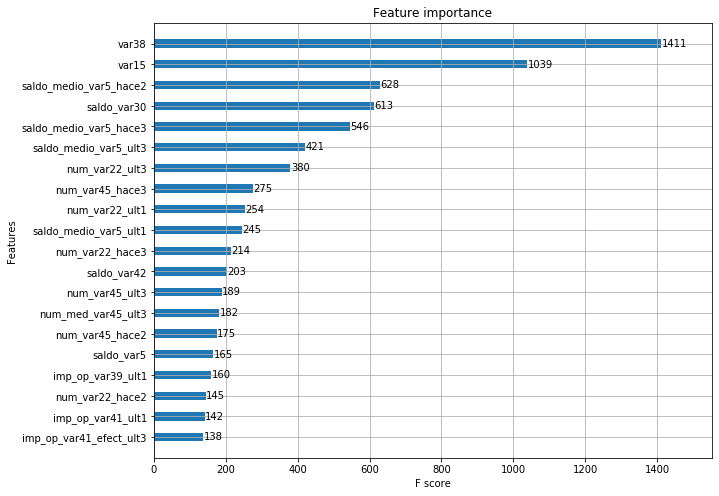

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [23]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC: 0.8396


In [24]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)

params = {
    'num_leaveas': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60, 100],
    'subsample': [0.8, 1]              
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearhCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/opt/anaconda2/envs/ml-guide/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

[30]	valid_0's auc: 0.87331	valid_0's binary_logloss: 0.124302	valid_1's auc: 0.83923	valid_1's binary_logloss: 0.139567
[31]	valid_0's auc: 0.874301	valid_0's binary_logloss: 0.124025	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139479
[32]	valid_0's auc: 0.875067	valid_0's binary_logloss: 0.123807	valid_1's auc: 0.839542	valid_1's binary_logloss: 0.139463
[33]	valid_0's auc: 0.875594	valid_0's binary_logloss: 0.123548	valid_1's auc: 0.839221	valid_1's binary_logloss: 0.139472
[34]	valid_0's auc: 0.876339	valid_0's binary_logloss: 0.123302	valid_1's auc: 0.839252	valid_1's binary_logloss: 0.139442
[35]	valid_0's auc: 0.877358	valid_0's binary_logloss: 0.123038	valid_1's auc: 0.839575	valid_1's binary_logloss: 0.139388
[36]	valid_0's auc: 0.878155	valid_0's binary_logloss: 0.122802	valid_1's auc: 0.839891	valid_1's binary_logloss: 0.139325
[37]	valid_0's auc: 0.87865	valid_0's binary_logloss: 0.122602	valid_1's auc: 0.83952	valid_1's binary_logloss: 0.139352
[38]	valid_0's auc: 

[32]	valid_0's auc: 0.87498	valid_0's binary_logloss: 0.123983	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.140089
[33]	valid_0's auc: 0.875554	valid_0's binary_logloss: 0.123732	valid_1's auc: 0.836029	valid_1's binary_logloss: 0.140068
[34]	valid_0's auc: 0.876155	valid_0's binary_logloss: 0.123462	valid_1's auc: 0.836426	valid_1's binary_logloss: 0.139981
[35]	valid_0's auc: 0.876572	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.836344	valid_1's binary_logloss: 0.139976
[36]	valid_0's auc: 0.877483	valid_0's binary_logloss: 0.122967	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.140009
[37]	valid_0's auc: 0.877743	valid_0's binary_logloss: 0.122789	valid_1's auc: 0.836411	valid_1's binary_logloss: 0.139938
[38]	valid_0's auc: 0.878327	valid_0's binary_logloss: 0.122561	valid_1's auc: 0.836513	valid_1's binary_logloss: 0.139924
[39]	valid_0's auc: 0.87872	valid_0's binary_logloss: 0.122336	valid_1's auc: 0.83678	valid_1's binary_logloss: 0.139879
[40]	valid_0's auc:

[17]	valid_0's auc: 0.861976	valid_0's binary_logloss: 0.12929	valid_1's auc: 0.836769	valid_1's binary_logloss: 0.141193
[18]	valid_0's auc: 0.863293	valid_0's binary_logloss: 0.128714	valid_1's auc: 0.836727	valid_1's binary_logloss: 0.140997
[19]	valid_0's auc: 0.864255	valid_0's binary_logloss: 0.128216	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.140725
[20]	valid_0's auc: 0.865107	valid_0's binary_logloss: 0.127743	valid_1's auc: 0.83713	valid_1's binary_logloss: 0.14056
[21]	valid_0's auc: 0.86602	valid_0's binary_logloss: 0.127273	valid_1's auc: 0.837407	valid_1's binary_logloss: 0.140449
[22]	valid_0's auc: 0.866715	valid_0's binary_logloss: 0.126909	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.140277
[23]	valid_0's auc: 0.867237	valid_0's binary_logloss: 0.126552	valid_1's auc: 0.837864	valid_1's binary_logloss: 0.140097
[24]	valid_0's auc: 0.868542	valid_0's binary_logloss: 0.126168	valid_1's auc: 0.838571	valid_1's binary_logloss: 0.139956
[25]	valid_0's auc: 

[17]	valid_0's auc: 0.860885	valid_0's binary_logloss: 0.129377	valid_1's auc: 0.836451	valid_1's binary_logloss: 0.141546
[18]	valid_0's auc: 0.862496	valid_0's binary_logloss: 0.128806	valid_1's auc: 0.837106	valid_1's binary_logloss: 0.141228
[19]	valid_0's auc: 0.863702	valid_0's binary_logloss: 0.128309	valid_1's auc: 0.836938	valid_1's binary_logloss: 0.14107
[20]	valid_0's auc: 0.864967	valid_0's binary_logloss: 0.127838	valid_1's auc: 0.836955	valid_1's binary_logloss: 0.140889
[21]	valid_0's auc: 0.865966	valid_0's binary_logloss: 0.127418	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.140792
[22]	valid_0's auc: 0.866843	valid_0's binary_logloss: 0.127019	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.14062
[23]	valid_0's auc: 0.868047	valid_0's binary_logloss: 0.126576	valid_1's auc: 0.836057	valid_1's binary_logloss: 0.140649
[24]	valid_0's auc: 0.86943	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140531
[25]	valid_0's auc:

[37]	valid_0's auc: 0.877938	valid_0's binary_logloss: 0.122961	valid_1's auc: 0.832765	valid_1's binary_logloss: 0.140286
[38]	valid_0's auc: 0.878348	valid_0's binary_logloss: 0.122759	valid_1's auc: 0.832532	valid_1's binary_logloss: 0.140293
[39]	valid_0's auc: 0.878948	valid_0's binary_logloss: 0.122536	valid_1's auc: 0.832607	valid_1's binary_logloss: 0.140279
Early stopping, best iteration is:
[9]	valid_0's auc: 0.848867	valid_0's binary_logloss: 0.135483	valid_1's auc: 0.83892	valid_1's binary_logloss: 0.145206
[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss

[65]	valid_0's auc: 0.888725	valid_0's binary_logloss: 0.1179	valid_1's auc: 0.837577	valid_1's binary_logloss: 0.139953
[66]	valid_0's auc: 0.888941	valid_0's binary_logloss: 0.117754	valid_1's auc: 0.837522	valid_1's binary_logloss: 0.139959
Early stopping, best iteration is:
[36]	valid_0's auc: 0.878155	valid_0's binary_logloss: 0.122802	valid_1's auc: 0.839891	valid_1's binary_logloss: 0.139325
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss

[21]	valid_0's auc: 0.865182	valid_0's binary_logloss: 0.127591	valid_1's auc: 0.835292	valid_1's binary_logloss: 0.140686
[22]	valid_0's auc: 0.865793	valid_0's binary_logloss: 0.127222	valid_1's auc: 0.834792	valid_1's binary_logloss: 0.140593
[23]	valid_0's auc: 0.866834	valid_0's binary_logloss: 0.126826	valid_1's auc: 0.834211	valid_1's binary_logloss: 0.140572
[24]	valid_0's auc: 0.868316	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.834416	valid_1's binary_logloss: 0.140463
[25]	valid_0's auc: 0.869256	valid_0's binary_logloss: 0.126116	valid_1's auc: 0.834141	valid_1's binary_logloss: 0.14042
[26]	valid_0's auc: 0.870178	valid_0's binary_logloss: 0.125774	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.140395
[27]	valid_0's auc: 0.871036	valid_0's binary_logloss: 0.125442	valid_1's auc: 0.832987	valid_1's binary_logloss: 0.140456
[28]	valid_0's auc: 0.872051	valid_0's binary_logloss: 0.125149	valid_1's auc: 0.832561	valid_1's binary_logloss: 0.140468
[29]	valid_0's au

[52]	valid_0's auc: 0.885196	valid_0's binary_logloss: 0.119679	valid_1's auc: 0.838393	valid_1's binary_logloss: 0.139699
[53]	valid_0's auc: 0.885338	valid_0's binary_logloss: 0.119548	valid_1's auc: 0.838001	valid_1's binary_logloss: 0.139791
[54]	valid_0's auc: 0.885614	valid_0's binary_logloss: 0.119385	valid_1's auc: 0.838202	valid_1's binary_logloss: 0.139768
[55]	valid_0's auc: 0.885938	valid_0's binary_logloss: 0.119251	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139786
[56]	valid_0's auc: 0.886429	valid_0's binary_logloss: 0.119055	valid_1's auc: 0.837879	valid_1's binary_logloss: 0.13982
[57]	valid_0's auc: 0.886708	valid_0's binary_logloss: 0.118889	valid_1's auc: 0.837536	valid_1's binary_logloss: 0.139896
[58]	valid_0's auc: 0.887188	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837426	valid_1's binary_logloss: 0.139947
[59]	valid_0's auc: 0.887446	valid_0's binary_logloss: 0.118619	valid_1's auc: 0.837178	valid_1's binary_logloss: 0.140027
[60]	valid_0's au

[9]	valid_0's auc: 0.848014	valid_0's binary_logloss: 0.135988	valid_1's auc: 0.838113	valid_1's binary_logloss: 0.145214
[10]	valid_0's auc: 0.85017	valid_0's binary_logloss: 0.134849	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.144343
[11]	valid_0's auc: 0.851927	valid_0's binary_logloss: 0.133928	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.143538
[12]	valid_0's auc: 0.853258	valid_0's binary_logloss: 0.133109	valid_1's auc: 0.838283	valid_1's binary_logloss: 0.143001
[13]	valid_0's auc: 0.854228	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.838046	valid_1's binary_logloss: 0.142459
[14]	valid_0's auc: 0.855145	valid_0's binary_logloss: 0.131708	valid_1's auc: 0.836653	valid_1's binary_logloss: 0.142168
[15]	valid_0's auc: 0.856229	valid_0's binary_logloss: 0.131101	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.141794
[16]	valid_0's auc: 0.856984	valid_0's binary_logloss: 0.130556	valid_1's auc: 0.837088	valid_1's binary_logloss: 0.141442
[17]	valid_0's auc: 

[38]	valid_0's auc: 0.876693	valid_0's binary_logloss: 0.123366	valid_1's auc: 0.840736	valid_1's binary_logloss: 0.138872
[39]	valid_0's auc: 0.87721	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.138842
[40]	valid_0's auc: 0.877881	valid_0's binary_logloss: 0.122933	valid_1's auc: 0.840856	valid_1's binary_logloss: 0.138868
[41]	valid_0's auc: 0.878371	valid_0's binary_logloss: 0.122711	valid_1's auc: 0.840708	valid_1's binary_logloss: 0.138892
[42]	valid_0's auc: 0.87895	valid_0's binary_logloss: 0.12248	valid_1's auc: 0.840784	valid_1's binary_logloss: 0.138896
[43]	valid_0's auc: 0.879752	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.138937
[44]	valid_0's auc: 0.880185	valid_0's binary_logloss: 0.122065	valid_1's auc: 0.840471	valid_1's binary_logloss: 0.138957
[45]	valid_0's auc: 0.880622	valid_0's binary_logloss: 0.121888	valid_1's auc: 0.840401	valid_1's binary_logloss: 0.138939
[46]	valid_0's auc: 

[38]	valid_0's auc: 0.876714	valid_0's binary_logloss: 0.123546	valid_1's auc: 0.839948	valid_1's binary_logloss: 0.139249
[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123365	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139264
[40]	valid_0's auc: 0.877792	valid_0's binary_logloss: 0.123177	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139237
[41]	valid_0's auc: 0.878351	valid_0's binary_logloss: 0.122944	valid_1's auc: 0.840017	valid_1's binary_logloss: 0.139212
[42]	valid_0's auc: 0.879056	valid_0's binary_logloss: 0.122701	valid_1's auc: 0.839819	valid_1's binary_logloss: 0.13929
[43]	valid_0's auc: 0.87974	valid_0's binary_logloss: 0.122473	valid_1's auc: 0.839622	valid_1's binary_logloss: 0.139313
[44]	valid_0's auc: 0.880079	valid_0's binary_logloss: 0.122291	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139263
[45]	valid_0's auc: 0.880792	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.839921	valid_1's binary_logloss: 0.139247
[46]	valid_0's auc:

[24]	valid_0's auc: 0.865105	valid_0's binary_logloss: 0.127328	valid_1's auc: 0.833512	valid_1's binary_logloss: 0.140562
[25]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.127003	valid_1's auc: 0.833697	valid_1's binary_logloss: 0.140441
[26]	valid_0's auc: 0.867527	valid_0's binary_logloss: 0.126671	valid_1's auc: 0.833779	valid_1's binary_logloss: 0.140377
[27]	valid_0's auc: 0.868352	valid_0's binary_logloss: 0.126326	valid_1's auc: 0.834217	valid_1's binary_logloss: 0.140261
[28]	valid_0's auc: 0.868893	valid_0's binary_logloss: 0.126057	valid_1's auc: 0.83354	valid_1's binary_logloss: 0.140312
[29]	valid_0's auc: 0.869583	valid_0's binary_logloss: 0.12579	valid_1's auc: 0.833882	valid_1's binary_logloss: 0.140238
[30]	valid_0's auc: 0.870324	valid_0's binary_logloss: 0.125523	valid_1's auc: 0.833945	valid_1's binary_logloss: 0.140186
[31]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.12528	valid_1's auc: 0.83371	valid_1's binary_logloss: 0.140179
[32]	valid_0's auc: 

[50]	valid_0's auc: 0.882452	valid_0's binary_logloss: 0.121142	valid_1's auc: 0.840657	valid_1's binary_logloss: 0.138849
[51]	valid_0's auc: 0.882887	valid_0's binary_logloss: 0.120958	valid_1's auc: 0.840661	valid_1's binary_logloss: 0.138857
[52]	valid_0's auc: 0.8832	valid_0's binary_logloss: 0.120819	valid_1's auc: 0.840247	valid_1's binary_logloss: 0.138963
[53]	valid_0's auc: 0.883494	valid_0's binary_logloss: 0.120677	valid_1's auc: 0.839979	valid_1's binary_logloss: 0.139036
[54]	valid_0's auc: 0.884012	valid_0's binary_logloss: 0.12052	valid_1's auc: 0.839865	valid_1's binary_logloss: 0.139051
[55]	valid_0's auc: 0.884243	valid_0's binary_logloss: 0.12039	valid_1's auc: 0.839812	valid_1's binary_logloss: 0.139084
[56]	valid_0's auc: 0.884436	valid_0's binary_logloss: 0.120266	valid_1's auc: 0.839479	valid_1's binary_logloss: 0.139175
[57]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120159	valid_1's auc: 0.839513	valid_1's binary_logloss: 0.13915
[58]	valid_0's auc: 0

[52]	valid_0's auc: 0.883549	valid_0's binary_logloss: 0.121011	valid_1's auc: 0.840006	valid_1's binary_logloss: 0.139271
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_logloss: 0.139167
[54]	valid_0's auc: 0.884174	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.840094	valid_1's binary_logloss: 0.139246
[55]	valid_0's auc: 0.884451	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.840264	valid_1's binary_logloss: 0.139268
[56]	valid_0's auc: 0.884908	valid_0's binary_logloss: 0.120416	valid_1's auc: 0.840308	valid_1's binary_logloss: 0.139263
[57]	valid_0's auc: 0.885325	valid_0's binary_logloss: 0.120236	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.139261
[58]	valid_0's auc: 0.885493	valid_0's binary_logloss: 0.120129	valid_1's auc: 0.839905	valid_1's binary_logloss: 0.139354
[59]	valid_0's auc: 0.885901	valid_0's binary_logloss: 0.119946	valid_1's auc: 0.839946	valid_1's binary_logloss: 0.139326
[60]	valid_0's auc

[37]	valid_0's auc: 0.875062	valid_0's binary_logloss: 0.123886	valid_1's auc: 0.832789	valid_1's binary_logloss: 0.140266
[38]	valid_0's auc: 0.875757	valid_0's binary_logloss: 0.123655	valid_1's auc: 0.832835	valid_1's binary_logloss: 0.140246
[39]	valid_0's auc: 0.876295	valid_0's binary_logloss: 0.123453	valid_1's auc: 0.832565	valid_1's binary_logloss: 0.140274
[40]	valid_0's auc: 0.876716	valid_0's binary_logloss: 0.123252	valid_1's auc: 0.832731	valid_1's binary_logloss: 0.140255
[41]	valid_0's auc: 0.877112	valid_0's binary_logloss: 0.123112	valid_1's auc: 0.832375	valid_1's binary_logloss: 0.140324
[42]	valid_0's auc: 0.877595	valid_0's binary_logloss: 0.122912	valid_1's auc: 0.83201	valid_1's binary_logloss: 0.140358
Early stopping, best iteration is:
[12]	valid_0's auc: 0.853258	valid_0's binary_logloss: 0.133109	valid_1's auc: 0.838283	valid_1's binary_logloss: 0.143001
[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_l

[65]	valid_0's auc: 0.887116	valid_0's binary_logloss: 0.119071	valid_1's auc: 0.840142	valid_1's binary_logloss: 0.139088
[66]	valid_0's auc: 0.887479	valid_0's binary_logloss: 0.118896	valid_1's auc: 0.839892	valid_1's binary_logloss: 0.139154
[67]	valid_0's auc: 0.887847	valid_0's binary_logloss: 0.11876	valid_1's auc: 0.84004	valid_1's binary_logloss: 0.139136
[68]	valid_0's auc: 0.88829	valid_0's binary_logloss: 0.118579	valid_1's auc: 0.839995	valid_1's binary_logloss: 0.139135
[69]	valid_0's auc: 0.888627	valid_0's binary_logloss: 0.118483	valid_1's auc: 0.839955	valid_1's binary_logloss: 0.139143
Early stopping, best iteration is:
[39]	valid_0's auc: 0.87721	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.138842
[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_log

[63]	valid_0's auc: 0.886754	valid_0's binary_logloss: 0.119375	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139437
[64]	valid_0's auc: 0.887115	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.839937	valid_1's binary_logloss: 0.139411
[65]	valid_0's auc: 0.887496	valid_0's binary_logloss: 0.119034	valid_1's auc: 0.839626	valid_1's binary_logloss: 0.139495
[66]	valid_0's auc: 0.887724	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.839388	valid_1's binary_logloss: 0.139588
[67]	valid_0's auc: 0.888125	valid_0's binary_logloss: 0.118739	valid_1's auc: 0.839206	valid_1's binary_logloss: 0.139622
[68]	valid_0's auc: 0.888299	valid_0's binary_logloss: 0.118633	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139707
[69]	valid_0's auc: 0.888524	valid_0's binary_logloss: 0.118515	valid_1's auc: 0.838941	valid_1's binary_logloss: 0.139747
[70]	valid_0's auc: 0.888691	valid_0's binary_logloss: 0.118412	valid_1's auc: 0.838928	valid_1's binary_logloss: 0.139773
[71]	valid_0's a

[9]	valid_0's auc: 0.851835	valid_0's binary_logloss: 0.135791	valid_1's auc: 0.839003	valid_1's binary_logloss: 0.145273
[10]	valid_0's auc: 0.852508	valid_0's binary_logloss: 0.134741	valid_1's auc: 0.83892	valid_1's binary_logloss: 0.144345
[11]	valid_0's auc: 0.854337	valid_0's binary_logloss: 0.133752	valid_1's auc: 0.838871	valid_1's binary_logloss: 0.143524
[12]	valid_0's auc: 0.855054	valid_0's binary_logloss: 0.132918	valid_1's auc: 0.83967	valid_1's binary_logloss: 0.142779
[13]	valid_0's auc: 0.855976	valid_0's binary_logloss: 0.132176	valid_1's auc: 0.838781	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.856987	valid_0's binary_logloss: 0.131533	valid_1's auc: 0.839077	valid_1's binary_logloss: 0.141766
[15]	valid_0's auc: 0.858155	valid_0's binary_logloss: 0.130906	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.141401
[16]	valid_0's auc: 0.858722	valid_0's binary_logloss: 0.130411	valid_1's auc: 0.838649	valid_1's binary_logloss: 0.141116
[17]	valid_0's auc:

[9]	valid_0's auc: 0.848197	valid_0's binary_logloss: 0.13595	valid_1's auc: 0.837398	valid_1's binary_logloss: 0.145511
[10]	valid_0's auc: 0.849929	valid_0's binary_logloss: 0.134872	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.144598
[11]	valid_0's auc: 0.851554	valid_0's binary_logloss: 0.133918	valid_1's auc: 0.837954	valid_1's binary_logloss: 0.143962
[12]	valid_0's auc: 0.854189	valid_0's binary_logloss: 0.133089	valid_1's auc: 0.838048	valid_1's binary_logloss: 0.143339
[13]	valid_0's auc: 0.856199	valid_0's binary_logloss: 0.132334	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.142793
[14]	valid_0's auc: 0.857051	valid_0's binary_logloss: 0.131663	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.142287
[15]	valid_0's auc: 0.858189	valid_0's binary_logloss: 0.13103	valid_1's auc: 0.837059	valid_1's binary_logloss: 0.141927
[16]	valid_0's auc: 0.859163	valid_0's binary_logloss: 0.130426	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.141604
[17]	valid_0's auc:

[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's auc: 0.892406	valid_0's binary_logloss: 0.116847	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.140242
Early stopping, best iteration is:
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_l

[25]	valid_0's auc: 0.869278	valid_0's binary_logloss: 0.125855	valid_1's auc: 0.839194	valid_1's binary_logloss: 0.139858
[26]	valid_0's auc: 0.87031	valid_0's binary_logloss: 0.125514	valid_1's auc: 0.838963	valid_1's binary_logloss: 0.139798
[27]	valid_0's auc: 0.871416	valid_0's binary_logloss: 0.125132	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.139761
[28]	valid_0's auc: 0.872084	valid_0's binary_logloss: 0.124849	valid_1's auc: 0.838682	valid_1's binary_logloss: 0.139716
[29]	valid_0's auc: 0.872718	valid_0's binary_logloss: 0.124559	valid_1's auc: 0.839209	valid_1's binary_logloss: 0.139633
[30]	valid_0's auc: 0.87331	valid_0's binary_logloss: 0.124302	valid_1's auc: 0.83923	valid_1's binary_logloss: 0.139567
[31]	valid_0's auc: 0.874301	valid_0's binary_logloss: 0.124025	valid_1's auc: 0.839609	valid_1's binary_logloss: 0.139479
[32]	valid_0's auc: 0.875067	valid_0's binary_logloss: 0.123807	valid_1's auc: 0.839542	valid_1's binary_logloss: 0.139463
[33]	valid_0's auc:

[26]	valid_0's auc: 0.870553	valid_0's binary_logloss: 0.125558	valid_1's auc: 0.836512	valid_1's binary_logloss: 0.140309
[27]	valid_0's auc: 0.871197	valid_0's binary_logloss: 0.125289	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.140322
[28]	valid_0's auc: 0.872214	valid_0's binary_logloss: 0.125004	valid_1's auc: 0.836006	valid_1's binary_logloss: 0.140245
[29]	valid_0's auc: 0.872988	valid_0's binary_logloss: 0.124721	valid_1's auc: 0.83621	valid_1's binary_logloss: 0.140169
[30]	valid_0's auc: 0.873816	valid_0's binary_logloss: 0.124436	valid_1's auc: 0.836131	valid_1's binary_logloss: 0.14012
[31]	valid_0's auc: 0.874365	valid_0's binary_logloss: 0.124189	valid_1's auc: 0.836271	valid_1's binary_logloss: 0.140094
[32]	valid_0's auc: 0.87498	valid_0's binary_logloss: 0.123983	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.140089
[33]	valid_0's auc: 0.875554	valid_0's binary_logloss: 0.123732	valid_1's auc: 0.836029	valid_1's binary_logloss: 0.140068
[34]	valid_0's auc:

[9]	valid_0's auc: 0.852138	valid_0's binary_logloss: 0.135338	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.145424
[10]	valid_0's auc: 0.854156	valid_0's binary_logloss: 0.134287	valid_1's auc: 0.83834	valid_1's binary_logloss: 0.144484
[11]	valid_0's auc: 0.856076	valid_0's binary_logloss: 0.133306	valid_1's auc: 0.83881	valid_1's binary_logloss: 0.143697
[12]	valid_0's auc: 0.856922	valid_0's binary_logloss: 0.132504	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.143034
[13]	valid_0's auc: 0.857557	valid_0's binary_logloss: 0.131789	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.142472
[14]	valid_0's auc: 0.858552	valid_0's binary_logloss: 0.131125	valid_1's auc: 0.837765	valid_1's binary_logloss: 0.14214
[15]	valid_0's auc: 0.859593	valid_0's binary_logloss: 0.130513	valid_1's auc: 0.837123	valid_1's binary_logloss: 0.141842
[16]	valid_0's auc: 0.86055	valid_0's binary_logloss: 0.129909	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.141471
[17]	valid_0's auc: 0.8

[9]	valid_0's auc: 0.848933	valid_0's binary_logloss: 0.135476	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.145676
[10]	valid_0's auc: 0.851338	valid_0's binary_logloss: 0.134365	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.144813
[11]	valid_0's auc: 0.852499	valid_0's binary_logloss: 0.133442	valid_1's auc: 0.83551	valid_1's binary_logloss: 0.144238
[12]	valid_0's auc: 0.854756	valid_0's binary_logloss: 0.13262	valid_1's auc: 0.835948	valid_1's binary_logloss: 0.143631
[13]	valid_0's auc: 0.856691	valid_0's binary_logloss: 0.131844	valid_1's auc: 0.83621	valid_1's binary_logloss: 0.143025
[14]	valid_0's auc: 0.857919	valid_0's binary_logloss: 0.131185	valid_1's auc: 0.837044	valid_1's binary_logloss: 0.142509
[15]	valid_0's auc: 0.858742	valid_0's binary_logloss: 0.130552	valid_1's auc: 0.836089	valid_1's binary_logloss: 0.142209
[16]	valid_0's auc: 0.859766	valid_0's binary_logloss: 0.129925	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.141675
[17]	valid_0's auc: 

[30]	valid_0's auc: 0.873295	valid_0's binary_logloss: 0.124587	valid_1's auc: 0.832473	valid_1's binary_logloss: 0.140414
[31]	valid_0's auc: 0.874231	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.832632	valid_1's binary_logloss: 0.140368
[32]	valid_0's auc: 0.875074	valid_0's binary_logloss: 0.12409	valid_1's auc: 0.83266	valid_1's binary_logloss: 0.140386
[33]	valid_0's auc: 0.875834	valid_0's binary_logloss: 0.123827	valid_1's auc: 0.832635	valid_1's binary_logloss: 0.140375
[34]	valid_0's auc: 0.87626	valid_0's binary_logloss: 0.123614	valid_1's auc: 0.832524	valid_1's binary_logloss: 0.140377
[35]	valid_0's auc: 0.87676	valid_0's binary_logloss: 0.123437	valid_1's auc: 0.83244	valid_1's binary_logloss: 0.140361
[36]	valid_0's auc: 0.87747	valid_0's binary_logloss: 0.123177	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.140283
[37]	valid_0's auc: 0.877938	valid_0's binary_logloss: 0.122961	valid_1's auc: 0.832765	valid_1's binary_logloss: 0.140286
[38]	valid_0's auc: 0.

[57]	valid_0's auc: 0.886708	valid_0's binary_logloss: 0.118889	valid_1's auc: 0.837536	valid_1's binary_logloss: 0.139896
[58]	valid_0's auc: 0.887188	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837426	valid_1's binary_logloss: 0.139947
[59]	valid_0's auc: 0.887446	valid_0's binary_logloss: 0.118619	valid_1's auc: 0.837178	valid_1's binary_logloss: 0.140027
[60]	valid_0's auc: 0.887865	valid_0's binary_logloss: 0.11846	valid_1's auc: 0.836969	valid_1's binary_logloss: 0.14005
[61]	valid_0's auc: 0.888226	valid_0's binary_logloss: 0.118331	valid_1's auc: 0.837173	valid_1's binary_logloss: 0.140037
[62]	valid_0's auc: 0.888553	valid_0's binary_logloss: 0.118164	valid_1's auc: 0.837112	valid_1's binary_logloss: 0.140044
[63]	valid_0's auc: 0.888575	valid_0's binary_logloss: 0.118062	valid_1's auc: 0.837155	valid_1's binary_logloss: 0.140004
[64]	valid_0's auc: 0.888679	valid_0's binary_logloss: 0.11799	valid_1's auc: 0.837375	valid_1's binary_logloss: 0.139969
[65]	valid_0's auc:

[9]	valid_0's auc: 0.848867	valid_0's binary_logloss: 0.135483	valid_1's auc: 0.83892	valid_1's binary_logloss: 0.145206
[10]	valid_0's auc: 0.851154	valid_0's binary_logloss: 0.134333	valid_1's auc: 0.838202	valid_1's binary_logloss: 0.144345
[11]	valid_0's auc: 0.852507	valid_0's binary_logloss: 0.133444	valid_1's auc: 0.837951	valid_1's binary_logloss: 0.14366
[12]	valid_0's auc: 0.853857	valid_0's binary_logloss: 0.13264	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.143061
[13]	valid_0's auc: 0.855288	valid_0's binary_logloss: 0.131813	valid_1's auc: 0.837856	valid_1's binary_logloss: 0.142623
[14]	valid_0's auc: 0.856947	valid_0's binary_logloss: 0.131129	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.142172
[15]	valid_0's auc: 0.857839	valid_0's binary_logloss: 0.130476	valid_1's auc: 0.837396	valid_1's binary_logloss: 0.141786
[16]	valid_0's auc: 0.859552	valid_0's binary_logloss: 0.129904	valid_1's auc: 0.836457	valid_1's binary_logloss: 0.141581
[17]	valid_0's auc: 

[37]	valid_0's auc: 0.87865	valid_0's binary_logloss: 0.122602	valid_1's auc: 0.83952	valid_1's binary_logloss: 0.139352
[38]	valid_0's auc: 0.879169	valid_0's binary_logloss: 0.122348	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139406
[39]	valid_0's auc: 0.879756	valid_0's binary_logloss: 0.122101	valid_1's auc: 0.839439	valid_1's binary_logloss: 0.139436
[40]	valid_0's auc: 0.880379	valid_0's binary_logloss: 0.121882	valid_1's auc: 0.839515	valid_1's binary_logloss: 0.139411
[41]	valid_0's auc: 0.880909	valid_0's binary_logloss: 0.121676	valid_1's auc: 0.839214	valid_1's binary_logloss: 0.13943
[42]	valid_0's auc: 0.881339	valid_0's binary_logloss: 0.121475	valid_1's auc: 0.839093	valid_1's binary_logloss: 0.139474
[43]	valid_0's auc: 0.881706	valid_0's binary_logloss: 0.121282	valid_1's auc: 0.839163	valid_1's binary_logloss: 0.13948
[44]	valid_0's auc: 0.882101	valid_0's binary_logloss: 0.121087	valid_1's auc: 0.839153	valid_1's binary_logloss: 0.13948
[45]	valid_0's auc: 0

[39]	valid_0's auc: 0.87872	valid_0's binary_logloss: 0.122336	valid_1's auc: 0.83678	valid_1's binary_logloss: 0.139879
[40]	valid_0's auc: 0.879344	valid_0's binary_logloss: 0.122099	valid_1's auc: 0.83679	valid_1's binary_logloss: 0.139882
[41]	valid_0's auc: 0.879962	valid_0's binary_logloss: 0.121909	valid_1's auc: 0.83662	valid_1's binary_logloss: 0.139881
[42]	valid_0's auc: 0.880363	valid_0's binary_logloss: 0.12173	valid_1's auc: 0.836837	valid_1's binary_logloss: 0.139882
[43]	valid_0's auc: 0.881052	valid_0's binary_logloss: 0.121557	valid_1's auc: 0.836607	valid_1's binary_logloss: 0.139902
[44]	valid_0's auc: 0.881618	valid_0's binary_logloss: 0.121322	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.13993
[45]	valid_0's auc: 0.882392	valid_0's binary_logloss: 0.121071	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139884
[46]	valid_0's auc: 0.88285	valid_0's binary_logloss: 0.120867	valid_1's auc: 0.837099	valid_1's binary_logloss: 0.139885
Early stopping, best it

[17]	valid_0's auc: 0.859498	valid_0's binary_logloss: 0.129886	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.140761
[18]	valid_0's auc: 0.860874	valid_0's binary_logloss: 0.129368	valid_1's auc: 0.8389	valid_1's binary_logloss: 0.140468
[19]	valid_0's auc: 0.861766	valid_0's binary_logloss: 0.1289	valid_1's auc: 0.838806	valid_1's binary_logloss: 0.140278
[20]	valid_0's auc: 0.862905	valid_0's binary_logloss: 0.128446	valid_1's auc: 0.838959	valid_1's binary_logloss: 0.140085
[21]	valid_0's auc: 0.863502	valid_0's binary_logloss: 0.128076	valid_1's auc: 0.838942	valid_1's binary_logloss: 0.139921
[22]	valid_0's auc: 0.864296	valid_0's binary_logloss: 0.127683	valid_1's auc: 0.839059	valid_1's binary_logloss: 0.139763
[23]	valid_0's auc: 0.865261	valid_0's binary_logloss: 0.127336	valid_1's auc: 0.838718	valid_1's binary_logloss: 0.139699
[24]	valid_0's auc: 0.866636	valid_0's binary_logloss: 0.126946	valid_1's auc: 0.839438	valid_1's binary_logloss: 0.139591
[25]	valid_0's auc: 

[17]	valid_0's auc: 0.859731	valid_0's binary_logloss: 0.129892	valid_1's auc: 0.837192	valid_1's binary_logloss: 0.141308
[18]	valid_0's auc: 0.860882	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.838224	valid_1's binary_logloss: 0.140974
[19]	valid_0's auc: 0.861894	valid_0's binary_logloss: 0.128944	valid_1's auc: 0.838396	valid_1's binary_logloss: 0.140709
[20]	valid_0's auc: 0.863529	valid_0's binary_logloss: 0.128489	valid_1's auc: 0.838677	valid_1's binary_logloss: 0.140488
[21]	valid_0's auc: 0.864356	valid_0's binary_logloss: 0.128094	valid_1's auc: 0.839019	valid_1's binary_logloss: 0.140311
[22]	valid_0's auc: 0.865334	valid_0's binary_logloss: 0.127707	valid_1's auc: 0.839649	valid_1's binary_logloss: 0.140054
[23]	valid_0's auc: 0.866298	valid_0's binary_logloss: 0.127351	valid_1's auc: 0.839657	valid_1's binary_logloss: 0.139965
[24]	valid_0's auc: 0.86725	valid_0's binary_logloss: 0.127004	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.139881
[25]	valid_0's au

[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

[30]	valid_0's auc: 0.871437	valid_0's binary_logloss: 0.12514	valid_1's auc: 0.839584	valid_1's binary_logloss: 0.139149
[31]	valid_0's auc: 0.872182	valid_0's binary_logloss: 0.124893	valid_1's auc: 0.839476	valid_1's binary_logloss: 0.13912
[32]	valid_0's auc: 0.872731	valid_0's binary_logloss: 0.124673	valid_1's auc: 0.839627	valid_1's binary_logloss: 0.139096
[33]	valid_0's auc: 0.873727	valid_0's binary_logloss: 0.124424	valid_1's auc: 0.840067	valid_1's binary_logloss: 0.138989
[34]	valid_0's auc: 0.874289	valid_0's binary_logloss: 0.124231	valid_1's auc: 0.84055	valid_1's binary_logloss: 0.138908
[35]	valid_0's auc: 0.874806	valid_0's binary_logloss: 0.124014	valid_1's auc: 0.840294	valid_1's binary_logloss: 0.138949
[36]	valid_0's auc: 0.875332	valid_0's binary_logloss: 0.123815	valid_1's auc: 0.840504	valid_1's binary_logloss: 0.138922
[37]	valid_0's auc: 0.875925	valid_0's binary_logloss: 0.123598	valid_1's auc: 0.840709	valid_1's binary_logloss: 0.138873
[38]	valid_0's auc:

[30]	valid_0's auc: 0.871458	valid_0's binary_logloss: 0.125366	valid_1's auc: 0.839569	valid_1's binary_logloss: 0.139382
[31]	valid_0's auc: 0.871841	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.839431	valid_1's binary_logloss: 0.139416
[32]	valid_0's auc: 0.872645	valid_0's binary_logloss: 0.124908	valid_1's auc: 0.839621	valid_1's binary_logloss: 0.139376
[33]	valid_0's auc: 0.87321	valid_0's binary_logloss: 0.124705	valid_1's auc: 0.839541	valid_1's binary_logloss: 0.139384
[34]	valid_0's auc: 0.874009	valid_0's binary_logloss: 0.124428	valid_1's auc: 0.83998	valid_1's binary_logloss: 0.139324
[35]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.124221	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139313
[36]	valid_0's auc: 0.875803	valid_0's binary_logloss: 0.123963	valid_1's auc: 0.840192	valid_1's binary_logloss: 0.139232
[37]	valid_0's auc: 0.87622	valid_0's binary_logloss: 0.12376	valid_1's auc: 0.839972	valid_1's binary_logloss: 0.139265
[38]	valid_0's auc: 

[17]	valid_0's auc: 0.858364	valid_0's binary_logloss: 0.13005	valid_1's auc: 0.837538	valid_1's binary_logloss: 0.141139
[18]	valid_0's auc: 0.860046	valid_0's binary_logloss: 0.129556	valid_1's auc: 0.837077	valid_1's binary_logloss: 0.141003
[19]	valid_0's auc: 0.861069	valid_0's binary_logloss: 0.129138	valid_1's auc: 0.836077	valid_1's binary_logloss: 0.140918
[20]	valid_0's auc: 0.861724	valid_0's binary_logloss: 0.128726	valid_1's auc: 0.836153	valid_1's binary_logloss: 0.14074
[21]	valid_0's auc: 0.862602	valid_0's binary_logloss: 0.128336	valid_1's auc: 0.835491	valid_1's binary_logloss: 0.140721
[22]	valid_0's auc: 0.863443	valid_0's binary_logloss: 0.127974	valid_1's auc: 0.835316	valid_1's binary_logloss: 0.140583
[23]	valid_0's auc: 0.864368	valid_0's binary_logloss: 0.127611	valid_1's auc: 0.834176	valid_1's binary_logloss: 0.140582
[24]	valid_0's auc: 0.865105	valid_0's binary_logloss: 0.127328	valid_1's auc: 0.833512	valid_1's binary_logloss: 0.140562
[25]	valid_0's auc

[42]	valid_0's auc: 0.87895	valid_0's binary_logloss: 0.12248	valid_1's auc: 0.840784	valid_1's binary_logloss: 0.138896
[43]	valid_0's auc: 0.879752	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.138937
[44]	valid_0's auc: 0.880185	valid_0's binary_logloss: 0.122065	valid_1's auc: 0.840471	valid_1's binary_logloss: 0.138957
[45]	valid_0's auc: 0.880622	valid_0's binary_logloss: 0.121888	valid_1's auc: 0.840401	valid_1's binary_logloss: 0.138939
[46]	valid_0's auc: 0.880977	valid_0's binary_logloss: 0.121723	valid_1's auc: 0.840724	valid_1's binary_logloss: 0.138863
[47]	valid_0's auc: 0.881443	valid_0's binary_logloss: 0.121549	valid_1's auc: 0.840484	valid_1's binary_logloss: 0.138909
[48]	valid_0's auc: 0.881854	valid_0's binary_logloss: 0.121403	valid_1's auc: 0.840467	valid_1's binary_logloss: 0.138899
[49]	valid_0's auc: 0.882123	valid_0's binary_logloss: 0.121282	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.138882
[50]	valid_0's auc:

[42]	valid_0's auc: 0.879056	valid_0's binary_logloss: 0.122701	valid_1's auc: 0.839819	valid_1's binary_logloss: 0.13929
[43]	valid_0's auc: 0.87974	valid_0's binary_logloss: 0.122473	valid_1's auc: 0.839622	valid_1's binary_logloss: 0.139313
[44]	valid_0's auc: 0.880079	valid_0's binary_logloss: 0.122291	valid_1's auc: 0.839933	valid_1's binary_logloss: 0.139263
[45]	valid_0's auc: 0.880792	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.839921	valid_1's binary_logloss: 0.139247
[46]	valid_0's auc: 0.881251	valid_0's binary_logloss: 0.121923	valid_1's auc: 0.839958	valid_1's binary_logloss: 0.139218
[47]	valid_0's auc: 0.88152	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.840143	valid_1's binary_logloss: 0.139192
[48]	valid_0's auc: 0.88219	valid_0's binary_logloss: 0.121602	valid_1's auc: 0.840103	valid_1's binary_logloss: 0.139201
[49]	valid_0's auc: 0.882712	valid_0's binary_logloss: 0.121424	valid_1's auc: 0.840249	valid_1's binary_logloss: 0.139187
[50]	valid_0's auc: 0

[30]	valid_0's auc: 0.870324	valid_0's binary_logloss: 0.125523	valid_1's auc: 0.833945	valid_1's binary_logloss: 0.140186
[31]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.12528	valid_1's auc: 0.83371	valid_1's binary_logloss: 0.140179
[32]	valid_0's auc: 0.871931	valid_0's binary_logloss: 0.124976	valid_1's auc: 0.833994	valid_1's binary_logloss: 0.140079
[33]	valid_0's auc: 0.872408	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.833799	valid_1's binary_logloss: 0.140112
[34]	valid_0's auc: 0.873329	valid_0's binary_logloss: 0.124548	valid_1's auc: 0.833509	valid_1's binary_logloss: 0.14014
[35]	valid_0's auc: 0.873749	valid_0's binary_logloss: 0.124318	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.140159
[36]	valid_0's auc: 0.874373	valid_0's binary_logloss: 0.124111	valid_1's auc: 0.832923	valid_1's binary_logloss: 0.14023
[37]	valid_0's auc: 0.875062	valid_0's binary_logloss: 0.123886	valid_1's auc: 0.832789	valid_1's binary_logloss: 0.140266
[38]	valid_0's auc: 0

[57]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120159	valid_1's auc: 0.839513	valid_1's binary_logloss: 0.13915
[58]	valid_0's auc: 0.884689	valid_0's binary_logloss: 0.12005	valid_1's auc: 0.839599	valid_1's binary_logloss: 0.139147
[59]	valid_0's auc: 0.885069	valid_0's binary_logloss: 0.119872	valid_1's auc: 0.839642	valid_1's binary_logloss: 0.139137
[60]	valid_0's auc: 0.885541	valid_0's binary_logloss: 0.119754	valid_1's auc: 0.839818	valid_1's binary_logloss: 0.139132
[61]	valid_0's auc: 0.885815	valid_0's binary_logloss: 0.119641	valid_1's auc: 0.839854	valid_1's binary_logloss: 0.139116
[62]	valid_0's auc: 0.8862	valid_0's binary_logloss: 0.119498	valid_1's auc: 0.839569	valid_1's binary_logloss: 0.13914
[63]	valid_0's auc: 0.886506	valid_0's binary_logloss: 0.119347	valid_1's auc: 0.839662	valid_1's binary_logloss: 0.139138
[64]	valid_0's auc: 0.886801	valid_0's binary_logloss: 0.119187	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139121
[65]	valid_0's auc: 0

[59]	valid_0's auc: 0.885901	valid_0's binary_logloss: 0.119946	valid_1's auc: 0.839946	valid_1's binary_logloss: 0.139326
[60]	valid_0's auc: 0.886097	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.839793	valid_1's binary_logloss: 0.13939
[61]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.119636	valid_1's auc: 0.83961	valid_1's binary_logloss: 0.139441
[62]	valid_0's auc: 0.886566	valid_0's binary_logloss: 0.119508	valid_1's auc: 0.839743	valid_1's binary_logloss: 0.13945
[63]	valid_0's auc: 0.886754	valid_0's binary_logloss: 0.119375	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139437
[64]	valid_0's auc: 0.887115	valid_0's binary_logloss: 0.119218	valid_1's auc: 0.839937	valid_1's binary_logloss: 0.139411
[65]	valid_0's auc: 0.887496	valid_0's binary_logloss: 0.119034	valid_1's auc: 0.839626	valid_1's binary_logloss: 0.139495
[66]	valid_0's auc: 0.887724	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.839388	valid_1's binary_logloss: 0.139588
[67]	valid_0's auc:

[43]	valid_0's auc: 0.889005	valid_0's binary_logloss: 0.120376	valid_1's auc: 0.841609	valid_1's binary_logloss: 0.138715
[44]	valid_0's auc: 0.889613	valid_0's binary_logloss: 0.120184	valid_1's auc: 0.84134	valid_1's binary_logloss: 0.138735
[45]	valid_0's auc: 0.890267	valid_0's binary_logloss: 0.119959	valid_1's auc: 0.841483	valid_1's binary_logloss: 0.138689
Early stopping, best iteration is:
[15]	valid_0's auc: 0.861566	valid_0's binary_logloss: 0.130154	valid_1's auc: 0.842494	valid_1's binary_logloss: 0.141215
GridSearhCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaveas': 32, 'subsample': 0.8}
ROC AUC: 0.8425


In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: